# Loan Prediction Model

## Machine Learning ALP - Hagen Kwik & Dhammiko Dharmawan

## Setup

### Import Libraries

In [1]:
# library for mathematical functions and data preprocessing such as table, etc
import pandas as pd
import numpy as np
from scipy.stats import skew

# Library for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# Library for machine learning functions/algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

### Load Dataset

In [2]:
# data itself
url = 'lending_club_loan_two.csv'
# description of each column
url_info = 'lending_club_info.csv'
df_before = pd.read_csv(url)
df_info = pd.read_csv(url_info)
df_before.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [4]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Exploratory Data Analysis & Data Preprocessing & Data Cleaning

### Check data values

In [5]:
df_before.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [6]:
# Check which column needs fixing
for column in df_before.columns:
    unique_values = df_before[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'loan_amnt':
[10000.  8000. 15600. ... 36275. 36475.   725.]

Unique values in 'term':
[' 36 months' ' 60 months']

Unique values in 'int_rate':
[11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 14.49 18.99

### Fix Data

In [3]:
# Create a new DataFrame for 'issue_d'
df_before_issue = df_before['issue_d'].str.split('-', expand=True)
df_before_issue.columns = ['issue_month', 'issue_year']

# Create a new DataFrame for 'earliest_cr_line'
df_before_cr_line = df_before['earliest_cr_line'].str.split('-', expand=True)
df_before_cr_line.columns = ['cr_line_month', 'cr_line_year']

# Concatenate the new DataFrames with the original DataFrame
df_before = pd.concat([df_before, df_before_issue, df_before_cr_line], axis=1)

### Remove Useless Columns

In [4]:
# Reason:
# These features lack direct relevance to a person's ability to secure a loan. 
# grade and subgrade, summarizes the loan status, can be substituted with existing data like interest rates and annual income

columns_to_drop = ['emp_title', 'address', 'title', 'earliest_cr_line', 'issue_d', 'grade', 'sub_grade', 'purpose','initial_list_status']
df_before = df_before.drop(columns=columns_to_drop)

### Label Encoding (LOAN STATUS GA HARUS DI ENCODE)

In [5]:
# label encoder and fit_transform is a function that changes/remap string into number based on alphabetical order
le = LabelEncoder() 
df_before['term'] = le.fit_transform(df_before['term'])
# 36 months = 0,  60 months = 1

df_before['emp_length'] = le.fit_transform(df_before['emp_length'])
# '1 year' = 0, '10+ years' = 1, '2 years' = 2, '3 years' = 3, '4 years' = 4, '5 years' = 5,   
# '6 years' = 6, '7 years' = 7, '8 years' = 8,  '9 years' = 9, '< 1 year' = 10

df_before['home_ownership'] = le.fit_transform(df_before['home_ownership'])
# 'ANY' = 0, 'MORTGAGE' = 1, 'NONE' = 2, 'OTHER' = 3, 'OWN' = 4, 'RENT' = 5

df_before['verification_status'] = le.fit_transform(df_before['verification_status'])
# 'Not Verified' = 0, 'Source Verified' = 1, 'Verified' = 2

df_before['loan_status'] = le.fit_transform(df_before['loan_status'])
# 'Charged Off' = 0, 'Fully Paid' = 1 

df_before['application_type'] = le.fit_transform(df_before['application_type'])
# 'DIRECT_PAY' = 0, 'INDIVIDUAL' = 1, 'JOINT' = 2

df_before['cr_line_month'] = le.fit_transform(df_before['cr_line_month'])
# 'Apr': 0, 'Aug': 1, 'Dec': 2, 'Feb': 3, 'Jan': 4, 'Jul': 5, 'Jun': 6, 'Mar': 7, 'May': 8, 'Nov': 9, 'Oct': 10, 'Sep': 11
df_before['issue_month'] = le.fit_transform(df_before['issue_month'])
# 'Apr': 0, 'Aug': 1, 'Dec': 2, 'Feb': 3, 'Jan': 4, 'Jul': 5, 'Jun': 6, 'Mar': 7, 'May': 8, 'Nov': 9, 'Oct': 10, 'Sep': 11

### Check Data for imputation

In [12]:
columns_to_check = ["pub_rec_bankruptcies", "revol_util", "mort_acc"]
df_graph = df_before.copy()

for column in columns_to_check:
    skewness = skew(df_graph[column].dropna())
    print(f"Skewness of {column}: {skewness}")

ordered_categories = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
df_graph['emp_length'] = pd.Categorical(df_graph['emp_length'], categories=ordered_categories, ordered=True)

Skewness of pub_rec_bankruptcies: 3.4234273840472755
Skewness of revol_util: -0.07177774827280235
Skewness of mort_acc: 1.6001257380122578


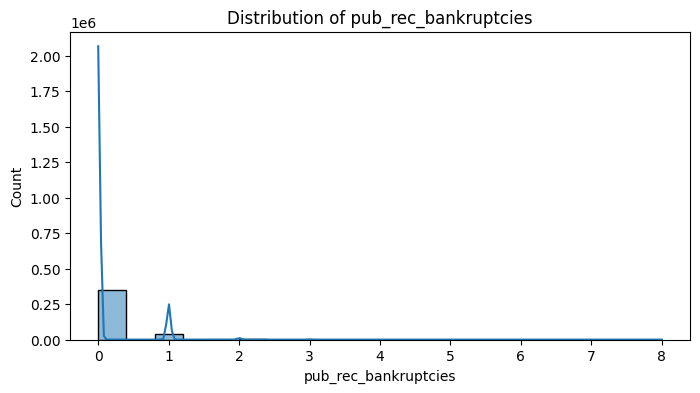

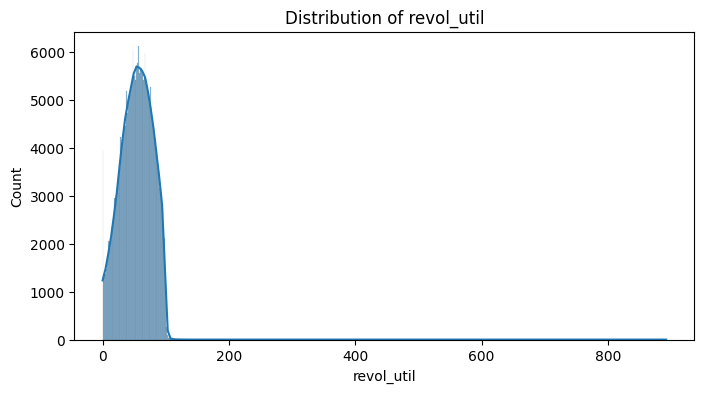

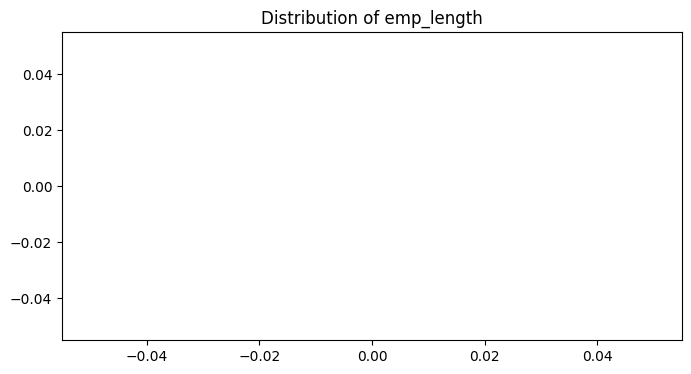

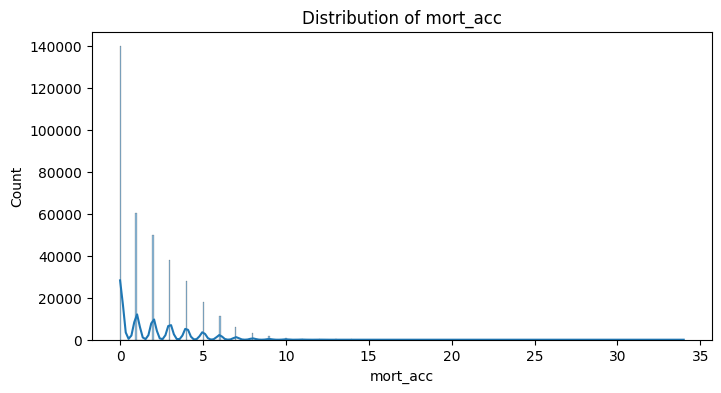

In [13]:
# Assuming your DataFrame is named df
columns_to_visualize = ['pub_rec_bankruptcies', 'revol_util', 'emp_length', 'mort_acc']
for column in columns_to_visualize:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_graph[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


### Fill Misssing Values / Imputation

numeric data uses either mean/median for imputation therefore we use them, however since they are skewed we use median as it is less prone to outliers except revol_util since it is normally distributed we can use mean


In [6]:
df_before['emp_length'].fillna(df_before['emp_length'].median(), inplace=True)
df_before['pub_rec_bankruptcies'].fillna(df_before['pub_rec_bankruptcies'].median(), inplace=True)
df_before['mort_acc'].fillna(df_before['mort_acc'].median(), inplace=True)
df_before['revol_util'].fillna(df_before['revol_util'].mean(), inplace=True)

In [15]:
df_before.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
issue_month             0
issue_year              0
cr_line_month           0
cr_line_year            0
dtype: int64

### Visualise Data 

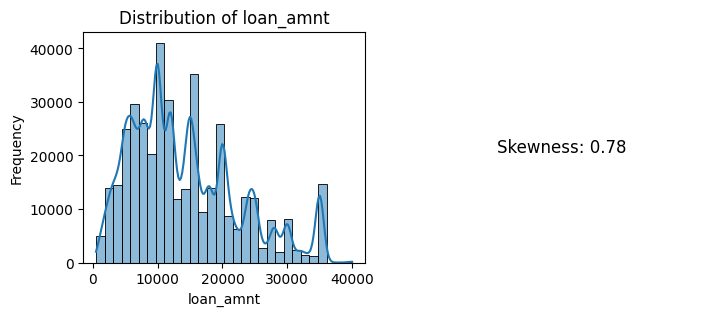

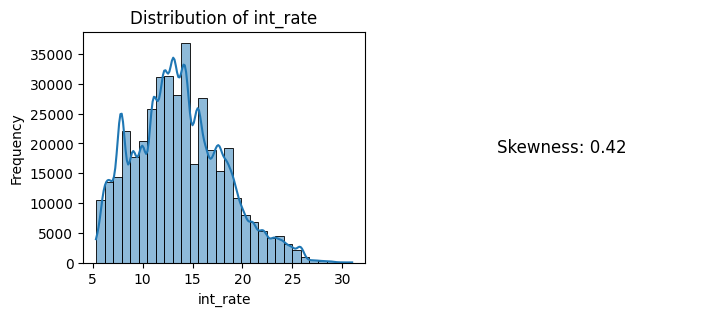

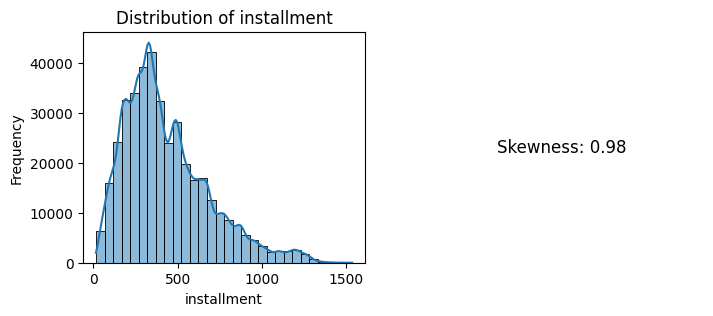

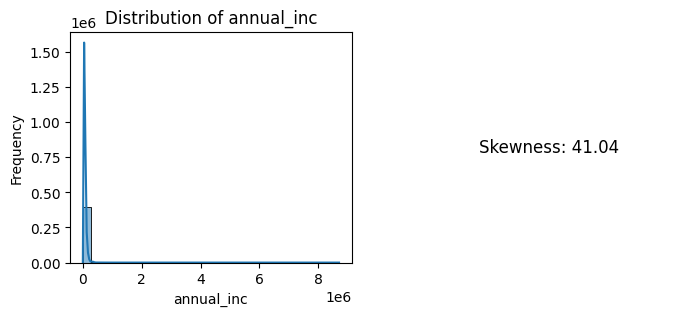

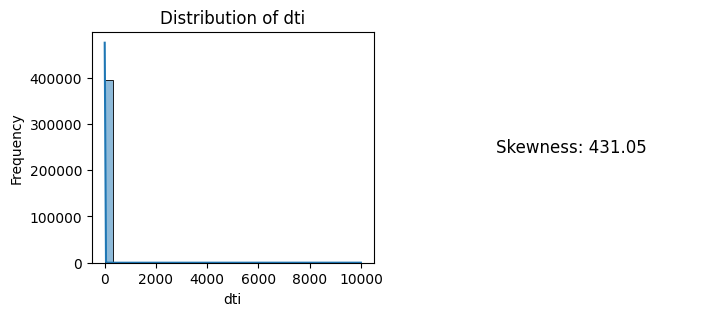

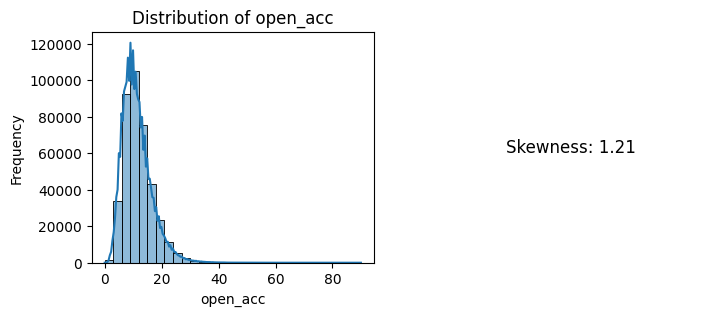

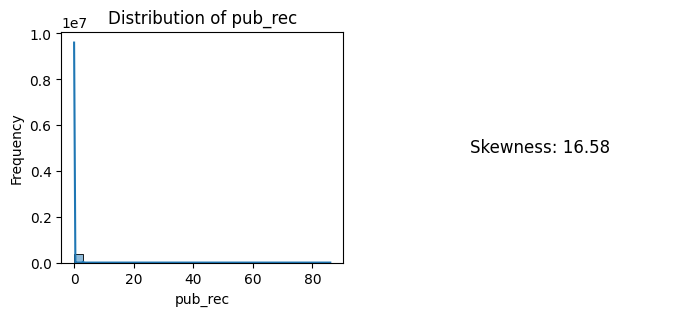

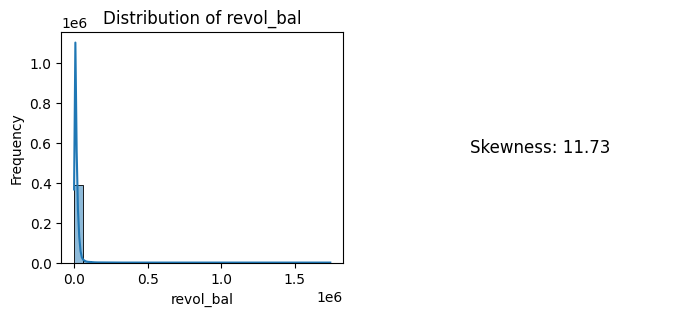

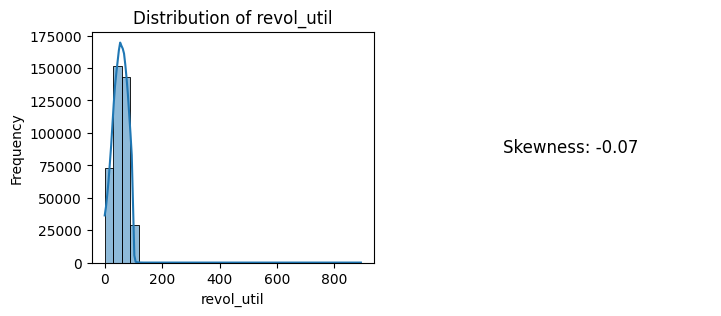

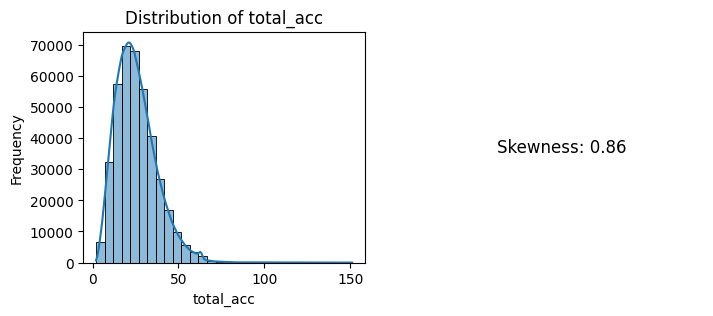

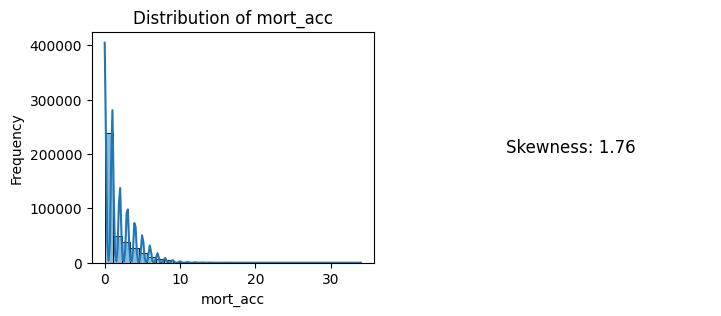

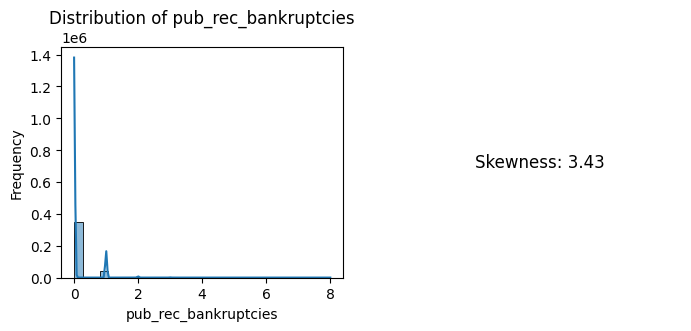

In [16]:
numeric_columns = df_before.select_dtypes(include=['float64']).columns

for col in numeric_columns:
    # Create a figure with two subplots: one for the histogram and one for the skewness information
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

    # Histogram
    sns.histplot(df_before[col], bins=30, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {col}')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')

    # Skewness information
    skewness = skew(df_before[col])
    ax2.text(0.5, 0.5, f'Skewness: {skewness:.2f}', horizontalalignment='center',
             verticalalignment='center', transform=ax2.transAxes, fontsize=12)
    ax2.axis('off')  # Turn off the axis for skewness information

    plt.show()



### Outlier Treatment (change outlier with the upper / lower limit value)

In [7]:
z_score_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc']

no_outlier = df_before.copy()

# Store outlier counts and percentages for each column
outlier_info = {}

for col in z_score_vars:
    # since our dataset is skewed we use the 99 percentile formula to detect and delete outliers, only identifying extreme datas
    lower_limit = df_before[col].quantile(0.01)
    upper_limit = df_before[col].quantile(0.99)

    # Count outliers before clipping
    outlier_count = ((df_before[col] < lower_limit) | (df_before[col] > upper_limit)).sum()
    total_count = len(df_before[col])
    outlier_percentage = outlier_count / total_count * 100

    # Store outlier information for the column
    outlier_info[col] = {'count': outlier_count, 'percentage': outlier_percentage}

# Print outlier information for each column
print("Outlier information:")
for col, info in outlier_info.items():
    print(f"- {col}: {info['count']} outliers ({info['percentage']:.2f}%)")

# Drop rows with outliers
for col in z_score_vars:
    lower_limit = df_before[col].quantile(0.01)
    upper_limit = df_before[col].quantile(0.99)
    no_outlier = no_outlier[(no_outlier[col] >= lower_limit) & (no_outlier[col] <= upper_limit)]

Outlier information:
- loan_amnt: 4089 outliers (1.03%)
- int_rate: 7823 outliers (1.98%)
- installment: 7916 outliers (2.00%)
- annual_inc: 7237 outliers (1.83%)
- dti: 7905 outliers (2.00%)
- open_acc: 5372 outliers (1.36%)
- pub_rec: 2543 outliers (0.64%)
- revol_bal: 7918 outliers (2.00%)
- total_acc: 7553 outliers (1.91%)


### Check Dataset proportion

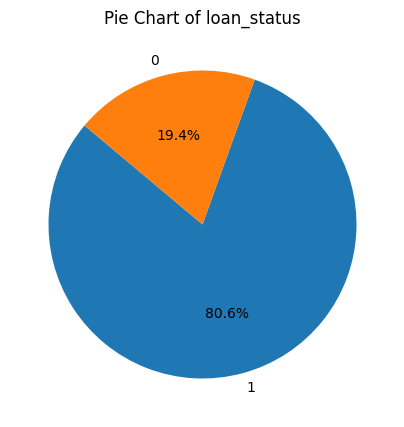

In [18]:
column_name = 'loan_status'

data_counts = no_outlier[column_name].value_counts()

# Plotting a pie chart
plt.figure(figsize=(5, 5))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_name}')
plt.show()

## Random Forest Classification (Model Generation)

In [9]:
#  SPLIT
target_column = 'loan_status'
feature_columns = no_outlier.columns[no_outlier.columns != target_column]

X = no_outlier[feature_columns]
y = no_outlier[target_column]

In [10]:
# use the pareto priuncple 

# Split data into training (80%) and temporary set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Over and Under sampling / Rebalance Training Dataset

In [11]:
X_train_resampled, y_train_resampled = SMOTEENN(sampling_strategy='all', enn=EditedNearestNeighbours(sampling_strategy='all')).fit_resample(X_train, y_train)

#### Check dataset after rebalancing

In [ ]:
data = y_train.value_counts()
print(data)

loan_status
1    225416
0     54117
Name: count, dtype: int64


In [ ]:
data_counts = y_train_resampled.value_counts()
print(data_counts)

loan_status
0    125814
1     99420
Name: count, dtype: int64


#### Find best n estimators

In [ ]:
# Hyper Paramaters:
# n estimator (value to be determined by using a for loop while checking  accuracy score)
# bootstrap value true (to validate test result by using selecting random data)
# criterion value gini (Computational Efficiency as we have a large dataset and is less sensitive to outliers)
# max depth value none(to use all variables as it is currently not overfitting)
# max features value all/auto (use all to diversify tree, create more robust)

# Create an empty dictionary to store n_estimator and corresponding accuracy scores
# n estimator is the number of trees in the forest
n_estimator_accuracy = {}

for i in range(50, 100):
    RFC = RandomForestClassifier(n_estimators = i, random_state=0, bootstrap=True, criterion="gini", max_depth=None)
    RFC.fit(X_train_resampled, y_train_resampled) 
    y_pred = RFC.predict(X_test)
     
    # Calculate accuracy and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    n_estimator_accuracy[i] = accuracy

# get the key/n estimator with the highest accuracy
best_n_estimator = max(n_estimator_accuracy, key=n_estimator_accuracy.get)
# get the value of the accuracy
best_accuracy_RFC = n_estimator_accuracy[best_n_estimator]

print(f"The best n_estimate value is {best_n_estimator} with an accuracy of {best_accuracy_RFC:.5f}")

The best n_estimate value is 83 with an accuracy of 0.76942


#### Use best n estimators

In [ ]:
# Hyper Paramaters:
# n estimator (value to be determined by using a for loop while checking  accuracy score)
# bootstrap value true (to validate test result by using selecting random data)
# criterion value gini (Computational Efficiency as we have a large dataset and is less sensitive to outliers)
# max depth value none( to use all variables as it is currently not overfitting)
# max features value all/auto (use all to diversify tree, create more robust)

clf = RandomForestClassifier(n_estimators=83, bootstrap=True, criterion='gini', max_depth=None,  random_state=0)

# Train the classifier on the training set
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Evaluate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy_test}')


Test Accuracy: 0.769417892507584


## Evaluation

### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix\n", cm)

Confusion Matrix
 [[ 4586  9053]
 [ 7210 49035]]


In [ ]:
target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

 Charged Off       0.39      0.34      0.36     13639
  Fully Paid       0.84      0.87      0.86     56245

    accuracy                           0.77     69884
   macro avg       0.62      0.60      0.61     69884
weighted avg       0.76      0.77      0.76     69884



In [ ]:
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
18,issue_year,0.148286
2,int_rate,0.145431
15,mort_acc,0.076165
6,annual_inc,0.069627
8,dti,0.056793
0,loan_amnt,0.050462
3,installment,0.046977
5,home_ownership,0.045298
11,revol_bal,0.043697
12,revol_util,0.041654


### F1 Score

In [ ]:
TN, FP, FN, TP = cm.ravel()

# Calculate Accuracy
# (TP+TN)/total sample
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Calculate Precision
# TP/(TP+FP)
# Precision is a measure of the accuracy of positive predictions made by the model. It answers the question: "Of all the instances predicted as positive, how many were actually positive?"
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Calculate Recall
# TP/(TP+FN)
# Recall measures the model's ability to identify all the positive instances correctly. It answers the question: "Of all the actual positive instances, how many were correctly predicted?"
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# Calculate Specificity
# TN/(TN+FN)
# specificity measures the model's ability to identify negative instances correctly. It answers the question: "Of all the actual negative instances, how many were correctly predicted?"
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Calculate F1 Score
# (2*Precision*Recall)/(Precision+Recall)
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

Accuracy: 0.767142693606548
Precision: 0.8438747419132828
Recall: 0.8720064005689394
Specificity: 0.3347019576215265
F1 Score: 0.8577099637126743


### AUC Score

AUC Score: 0.6989938615719822


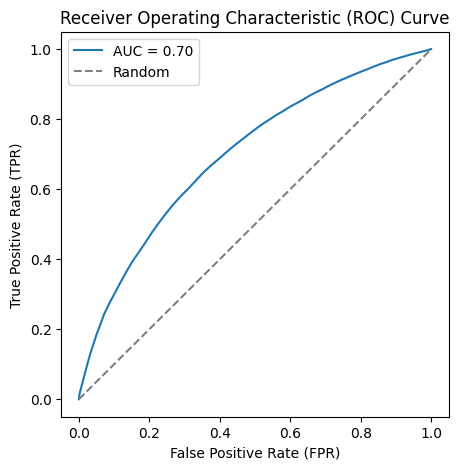

In [ ]:
# Assuming you have the predicted probabilities for the positive class
y_prob_test = clf.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob_test)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# is 69 auc score good what does it mean, what can i do to increase it?

AUC is a performance metric used to evaluate the ability of a classification model to distinguish between positive and negative classes.
our AUC score is 0.7 that indicates that our model is effective enough at differentiating between positive and negative instances. out of 10 datas, it can identify 7 data's class

## Conclusion